# Mutual Information Score

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd 
df = pd.read_csv('../Datasets/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Seperate X and Y 

In [4]:
X = df.drop(columns=['PassengerId','Name','Cabin','Ticket','Survived'])
Y = df[['Survived']]

In [5]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Seperate cat and Con Features

In [6]:
from PM6func import catconsep
cat,con = catconsep(X)

In [7]:
cat

['Sex', 'Embarked']

In [8]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Create a Pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ordinal',OrdinalEncoder())])
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [10]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.87348191,  0.3349926 , -0.49947002, ..., -0.49840706,
         1.        ,  1.        ],
       [ 0.87348191,  1.32553003,  0.61699237, ..., -0.51327429,
         0.        ,  2.        ],
       [-0.31581919,  2.51417495, -0.49947002, ..., -0.46508846,
         1.        ,  1.        ],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ..., -0.50879189,
         1.        ,  2.        ],
       [ 0.87348191,  0.        , -0.49947002, ..., -0.4944482 ,
         1.        ,  2.        ],
       [ 0.87348191,  0.        ,  0.61699237, ..., -0.23790598,
         1.        ,  0.        ]], shape=(418, 7))

In [11]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Embarked'], dtype=object)

In [12]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Embarked
0,0.873482,0.334993,-0.499470,-0.400248,-0.498407,1.0,1.0
1,0.873482,1.325530,0.616992,-0.400248,-0.513274,0.0,2.0
2,-0.315819,2.514175,-0.499470,-0.400248,-0.465088,1.0,1.0
3,0.873482,-0.259330,-0.499470,-0.400248,-0.483466,1.0,2.0
4,0.873482,-0.655545,0.616992,0.619896,-0.418471,0.0,2.0
...,...,...,...,...,...,...,...
413,0.873482,0.000000,-0.499470,-0.400248,-0.494448,1.0,2.0
414,-1.505120,0.691586,-0.499470,-0.400248,1.313753,0.0,0.0
415,0.873482,0.651965,-0.499470,-0.400248,-0.508792,1.0,2.0
416,0.873482,0.000000,-0.499470,-0.400248,-0.494448,1.0,2.0


In [13]:
from sklearn.feature_selection import mutual_info_classif
mic = mutual_info_classif(X_pre, Y)
mic


array([0.02432568, 0.02877513, 0.03680941, 0.01030629, 0.04762646,
       0.65667953, 0.0166556 ])

In [14]:
m = pd.Series(mic)
m.index = X_pre.columns
m =m.sort_values(ascending=False)
m

cat__Sex         0.656680
num__Fare        0.047626
num__SibSp       0.036809
num__Age         0.028775
num__Pclass      0.024326
cat__Embarked    0.016656
num__Parch       0.010306
dtype: float64

<Axes: title={'center': 'Mutual Information Score'}>

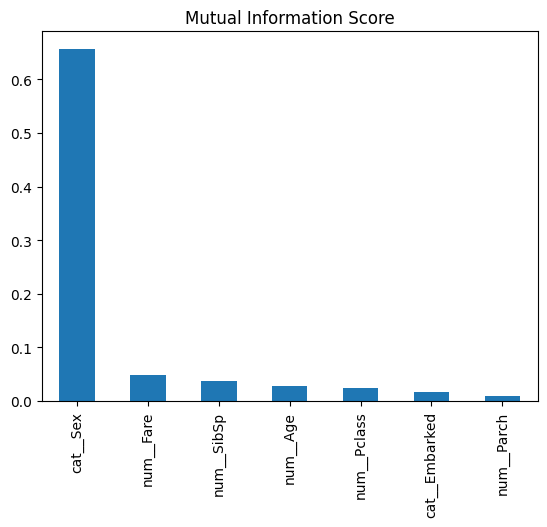

In [15]:
m.plot(kind='bar',title='Mutual Information Score')

In [16]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest( mutual_info_classif,k = 4)
sel.fit(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Age', 'num__Fare', 'cat__Sex', 'cat__Embarked'], dtype=object)

In [17]:
s = sel_cols[0].split('__')[1]
s

'Age'

In [18]:
imp_cols=[]
for i in sel_cols:
    s =i.split('__')[1]
    imp_cols.append(s)
imp_cols

['Age', 'Fare', 'Sex', 'Embarked']

In [19]:
X_new = X[imp_cols]
X_new

,Age,Fare,Sex,Embarked
0,34.5,7.8292,male,Q
1,47.0,7.0000,female,S
2,62.0,9.6875,male,Q
3,27.0,8.6625,male,S
4,22.0,12.2875,female,S
...,...,...,...,...
413,NaN,8.0500,male,S
414,39.0,108.9000,female,C
415,38.5,7.2500,male,S
416,NaN,8.0500,male,S


### Seperate cat and con for imp columns

In [20]:
cat_sel, con_sel =catconsep(X_new)
cat_sel

['Sex', 'Embarked']

In [21]:
con_sel

['Age', 'Fare']

## create new Pipeline for imp Columns

In [22]:
from sklearn.preprocessing import OneHotEncoder
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                            ('Scaler',StandardScaler())])
cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('OHE',OneHotEncoder(handle_unknown='ignore'))])
pre2 = ColumnTransformer([('num',num_pipe1,con_sel),
                          ('cat',cat_pipe1,cat_sel)])
pre2

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [23]:
X_new = pre2.fit_transform(X_new)
X_new

array([[ 0.3349926 , -0.49840706,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.32553003, -0.51327429,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.51417495, -0.46508846,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.65196458, -0.50879189,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.4944482 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.23790598,  0.        , ...,  1.        ,
         0.        ,  0.        ]], shape=(418, 7))

In [24]:
cols2 = pre2.get_feature_names_out()
cols2

array(['num__Age', 'num__Fare', 'cat__Sex_female', 'cat__Sex_male',
       'cat__Embarked_C', 'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype=object)

In [25]:
X_new = pd.DataFrame(X_new, columns=cols2)
X_new

,num__Age,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.334993,-0.498407,0.0,1.0,0.0,1.0,0.0
1,1.325530,-0.513274,1.0,0.0,0.0,0.0,1.0
2,2.514175,-0.465088,0.0,1.0,0.0,1.0,0.0
3,-0.259330,-0.483466,0.0,1.0,0.0,0.0,1.0
4,-0.655545,-0.418471,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
413,0.000000,-0.494448,0.0,1.0,0.0,0.0,1.0
414,0.691586,1.313753,1.0,0.0,1.0,0.0,0.0
415,0.651965,-0.508792,0.0,1.0,0.0,0.0,1.0
416,0.000000,-0.494448,0.0,1.0,0.0,0.0,1.0


## Apply train test split

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_new,Y,test_size=0.33,random_state=42)

## Use model to train and test result

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
model.score(xtrain,ytrain)

1.0

In [29]:
model.score(xtest,ytest)

1.0

In [30]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)


In [31]:
ypred_tr[0:5]

array([0, 1, 0, 0, 1])

In [32]:
ytrain.head()

,Survived
109,0
176,1
366,0
407,0
280,1


In [33]:
ytest.head()

,Survived
321,0
324,1
388,0
56,0
153,1


In [34]:
ypred_ts[0:5]

array([0, 1, 0, 0, 1])

## create a confusion metrics

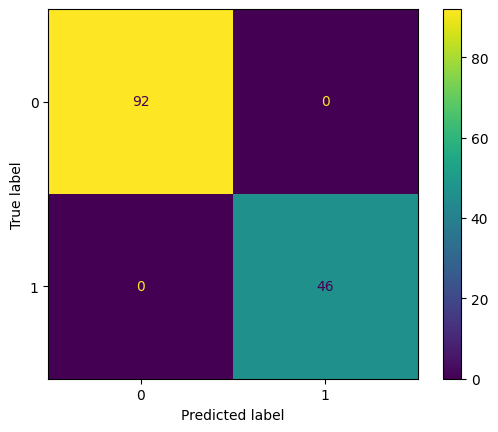

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()